In [1]:
#Machine Learning with Material Databases

In [2]:
#1-pymatgen
#https://pymatgen.org/
#conda install --channel conda-forge pymatgen

#2-matminer
#https://hackingmaterials.lbl.gov/matminer/
#conda install -c conda-forge matminer

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
import matminer

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [5]:
from matminer.datasets import get_available_datasets
get_available_datasets ()

boltztrap_mp: Effective mass and thermoelectric properties of 8924 compounds in The  Materials Project database that are calculated by the BoltzTraP software package run on the GGA-PBE or GGA+U density functional theory calculation results. The properties are reported at the temperature of 300 Kelvin and the carrier concentration of 1e18 1/cm3.

brgoch_superhard_training: 2574 materials used for training regressors that predict shear and bulk modulus.

castelli_perovskites: 18,928 perovskites generated with ABX combinatorics, calculating gllbsc band gap and pbe structure, and also reporting absolute band edge positions and heat of formation.

citrine_thermal_conductivity: Thermal conductivity of 872 compounds measured experimentally and retrieved from Citrine database from various references. The reported values are measured at various temperatures of which 295 are at room temperature.

dielectric_constant: 1,056 structures with dielectric properties, calculated with DFPT-PBE.

double_

['boltztrap_mp',
 'brgoch_superhard_training',
 'castelli_perovskites',
 'citrine_thermal_conductivity',
 'dielectric_constant',
 'double_perovskites_gap',
 'double_perovskites_gap_lumo',
 'elastic_tensor_2015',
 'expt_formation_enthalpy',
 'expt_formation_enthalpy_kingsbury',
 'expt_gap',
 'expt_gap_kingsbury',
 'flla',
 'glass_binary',
 'glass_binary_v2',
 'glass_ternary_hipt',
 'glass_ternary_landolt',
 'heusler_magnetic',
 'jarvis_dft_2d',
 'jarvis_dft_3d',
 'jarvis_ml_dft_training',
 'm2ax',
 'matbench_dielectric',
 'matbench_expt_gap',
 'matbench_expt_is_metal',
 'matbench_glass',
 'matbench_jdft2d',
 'matbench_log_gvrh',
 'matbench_log_kvrh',
 'matbench_mp_e_form',
 'matbench_mp_gap',
 'matbench_mp_is_metal',
 'matbench_perovskites',
 'matbench_phonons',
 'matbench_steels',
 'mp_all_20181018',
 'mp_nostruct_20181018',
 'phonon_dielectric_mp',
 'piezoelectric_tensor',
 'ricci_boltztrap_mp_tabular',
 'steel_strength',
 'wolverton_oxides']

In [6]:
#from matminer.datasets import load_dataset
#df = load_dataset("mp_all_20181018")

In [7]:
#my API Key is ABC1234DEF5678

with MPRester("ABC1234DEF5678") as mpr:
    criteria={"elements":{"$all":["C"]}, "nelements":1}
    properties=['material_id', 'energy_per_atom', 'structure']
    shortC=(mpr.query(criteria, properties))

In [8]:
dfC=pd.DataFrame(shortC)
dfC

,material_id,energy_per_atom,structure
0,mp-611448,-9.084172,"[[ 1.261126 -0.72811279 4.41230334] C, [ 1...."
1,mp-1097832,-6.621004,[[ 7.62895459e-01 -2.18079784e-17 7.40990775e...
2,mp-1205283,-8.529363,"[[4.559048 2.57875261 3.62098509] C, [4.5590..."
3,mp-24,-8.393691,"[[ 0.42143899 2.65990899 -0.42143899] C, [-0...."
4,mp-1078845,-8.960877,"[[3.46732536 1.46166041 0. ] C, [ 0.787..."
5,mp-1244913,-8.232973,"[[7.52983201 6.30191241 0.6833079 ] C, [8.4740..."
6,mp-1008374,-8.790253,"[[ 1.350784 -1.48151603 1.2560005 ] C, [ 1...."
7,mp-579909,-8.283658,"[[ 1.228789 -1.372186 0.68277622] C, [2.4..."
8,mp-1181996,-6.591845,[[0. 0. 0.] C]
9,mp-1194362,-7.724296,"[[2.43045611 8.0770378 6.39587916] C, [5.4674..."


In [9]:
from matminer.featurizers.structure import XRDPowderPattern
xrd = XRDPowderPattern()
xrd.feature_labels()

['xrd_0',
 'xrd_1',
 'xrd_2',
 'xrd_3',
 'xrd_4',
 'xrd_5',
 'xrd_6',
 'xrd_7',
 'xrd_8',
 'xrd_9',
 'xrd_10',
 'xrd_11',
 'xrd_12',
 'xrd_13',
 'xrd_14',
 'xrd_15',
 'xrd_16',
 'xrd_17',
 'xrd_18',
 'xrd_19',
 'xrd_20',
 'xrd_21',
 'xrd_22',
 'xrd_23',
 'xrd_24',
 'xrd_25',
 'xrd_26',
 'xrd_27',
 'xrd_28',
 'xrd_29',
 'xrd_30',
 'xrd_31',
 'xrd_32',
 'xrd_33',
 'xrd_34',
 'xrd_35',
 'xrd_36',
 'xrd_37',
 'xrd_38',
 'xrd_39',
 'xrd_40',
 'xrd_41',
 'xrd_42',
 'xrd_43',
 'xrd_44',
 'xrd_45',
 'xrd_46',
 'xrd_47',
 'xrd_48',
 'xrd_49',
 'xrd_50',
 'xrd_51',
 'xrd_52',
 'xrd_53',
 'xrd_54',
 'xrd_55',
 'xrd_56',
 'xrd_57',
 'xrd_58',
 'xrd_59',
 'xrd_60',
 'xrd_61',
 'xrd_62',
 'xrd_63',
 'xrd_64',
 'xrd_65',
 'xrd_66',
 'xrd_67',
 'xrd_68',
 'xrd_69',
 'xrd_70',
 'xrd_71',
 'xrd_72',
 'xrd_73',
 'xrd_74',
 'xrd_75',
 'xrd_76',
 'xrd_77',
 'xrd_78',
 'xrd_79',
 'xrd_80',
 'xrd_81',
 'xrd_82',
 'xrd_83',
 'xrd_84',
 'xrd_85',
 'xrd_86',
 'xrd_87',
 'xrd_88',
 'xrd_89',
 'xrd_90',
 'xrd_91'

In [10]:
from IPython.display import Image
Image(url= "A25.png", width=600, height=600)

In [11]:
dfC = xrd.featurize_dataframe(dfC, "structure")
dfC

XRDPowderPattern:   0%|          | 0/58 [00:00<?, ?it/s]

,material_id,energy_per_atom,structure,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,...,xrd_118,xrd_119,xrd_120,xrd_121,xrd_122,xrd_123,xrd_124,xrd_125,xrd_126,xrd_127
0,mp-611448,-9.084172,"[[ 1.261126 -0.72811279 4.41230334] C, [ 1....",6.620480e-322,5.830838e-307,2.899859e-292,6.253277e-278,5.846865e-264,2.370408e-250,4.166852e-237,...,6.407211e-03,1.193596e-02,9.641180e-03,3.376664e-03,5.127791e-04,3.376427e-05,9.639827e-07,1.193344e-08,6.405412e-11,1.490778e-13
1,mp-1097832,-6.621004,[[ 7.62895459e-01 -2.18079784e-17 7.40990775e...,2.980886e-95,4.600224e-85,1.851663e-75,1.943993e-66,5.323249e-58,3.801968e-50,7.082552e-43,...,9.083394e-05,1.974943e-06,1.119981e-08,1.656594e-11,6.391036e-15,6.430961e-19,1.687835e-23,1.155404e-28,2.062942e-34,9.607047e-41
2,mp-1205283,-8.529363,"[[4.559048 2.57875261 3.62098509] C, [4.5590...",5.210033e-78,2.938398e-65,1.102634e-53,2.753010e-43,4.573557e-34,5.056110e-26,3.720844e-19,...,2.148106e-282,1.331059e-308,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,mp-24,-8.393691,"[[ 0.42143899 2.65990899 -0.42143899] C, [-0....",1.596699e-216,5.263921e-206,9.441795e-196,9.214226e-186,4.892404e-176,1.413334e-166,2.221398e-157,...,2.606463e-05,3.600635e-04,2.706236e-03,1.106652e-02,2.462158e-02,2.980436e-02,1.962920e-02,7.033714e-03,1.371279e-03,1.454541e-04
4,mp-1078845,-8.960877,"[[3.46732536 1.46166041 0. ] C, [ 0.787...",2.172581e-72,8.999390e-66,1.723362e-59,1.525689e-53,6.244272e-48,1.181473e-42,1.033456e-37,...,3.816275e-03,4.994336e-03,3.263727e-03,1.193926e-03,3.178016e-04,3.465920e-04,1.032623e-03,1.597258e-03,1.145496e-03,3.798131e-04
5,mp-1244913,-8.232973,"[[7.52983201 6.30191241 0.6833079 ] C, [8.4740...",4.130592e-81,4.799742e-63,2.631624e-47,6.810587e-34,8.323020e-23,4.805715e-14,1.312437e-07,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,mp-1008374,-8.790253,"[[ 1.350784 -1.48151603 1.2560005 ] C, [ 1....",2.915430e-64,5.645582e-59,6.323858e-54,4.097536e-49,1.535786e-44,3.329706e-40,4.175885e-36,...,2.499093e-03,3.517976e-03,4.331552e-03,7.172949e-03,1.163158e-02,1.229378e-02,7.653580e-03,2.763203e-03,5.772725e-04,6.976496e-05
7,mp-579909,-8.283658,"[[ 1.228789 -1.372186 0.68277622] C, [2.4...",4.455696e-61,6.501019e-53,2.389533e-45,2.212637e-38,5.161468e-32,3.033205e-26,4.490515e-21,...,3.278218e-11,1.351048e-14,1.402715e-18,3.668884e-23,2.417487e-28,4.012914e-34,1.678113e-40,1.767862e-47,4.691820e-55,3.136894e-63
8,mp-1181996,-6.591845,[[0. 0. 0.] C],4.796909e-107,8.650251e-100,8.606623e-93,4.724695e-86,1.431040e-79,2.391478e-73,2.205049e-67,...,1.092406e-05,4.589267e-07,1.063750e-08,1.360419e-10,9.599365e-13,3.737226e-15,8.027736e-18,9.514232e-21,6.221445e-24,2.244635e-27
9,mp-1194362,-7.724296,"[[2.43045611 8.0770378 6.39587916] C, [5.4674...",1.145491e-56,1.230828e-45,7.726093e-36,2.833216e-27,6.069548e-20,7.596089e-14,5.553679e-09,...,1.717170e-24,2.747406e-32,2.567967e-41,1.402210e-51,4.472945e-63,8.335490e-76,9.074563e-90,5.771349e-105,2.144302e-121,4.654270e-139


In [12]:
# Run ML
# energy_per_atom need to predict (y value)

y = dfC['energy_per_atom'].values
print(y)

[-9.08417248 -6.6210038  -8.5293626  -8.39369124 -8.96087708 -8.23297346
 -8.79025297 -8.28365806 -6.59184474 -7.72429623 -8.46343131 -7.69900272
 -7.81816577 -9.22047586 -8.87825262 -8.89358382 -9.19801    -9.21672815
 -9.2184254  -9.08096683 -8.83997257 -8.46308294 -9.08561166 -7.92127497
 -9.2188823  -9.22260534 -9.21922513 -9.11079527 -8.69780232 -9.0903508
 -9.21902487 -8.92774856 -8.18433967 -8.22611857 -6.4641748  -9.06526381
 -8.83310144 -8.0600253  -8.29272505 -9.08206167 -8.10530816 -8.84362941
 -8.81951546 -9.22544346 -7.97257679 -8.21359339 -8.83798774 -9.22041158
 -6.59501495 -9.22676982 -8.71977848 -9.08240808 -9.22029716 -8.22989011
 -9.21453406 -9.21889291 -8.93598546 -7.3083753 ]


In [13]:
#need to drop other unwanted features and only xrd information is remaining
x = dfC.drop(["material_id", "energy_per_atom", "structure"], axis=1)
print(x)

            xrd_0          xrd_1          xrd_2          xrd_3          xrd_4  \
0   6.620480e-322  5.830838e-307  2.899859e-292  6.253277e-278  5.846865e-264   
1    2.980886e-95   4.600224e-85   1.851663e-75   1.943993e-66   5.323249e-58   
2    5.210033e-78   2.938398e-65   1.102634e-53   2.753010e-43   4.573557e-34   
3   1.596699e-216  5.263921e-206  9.441795e-196  9.214226e-186  4.892404e-176   
4    2.172581e-72   8.999390e-66   1.723362e-59   1.525689e-53   6.244272e-48   
5    4.130592e-81   4.799742e-63   2.631624e-47   6.810587e-34   8.323020e-23   
6    2.915430e-64   5.645582e-59   6.323858e-54   4.097536e-49   1.535786e-44   
7    4.455696e-61   6.501019e-53   2.389533e-45   2.212637e-38   5.161468e-32   
8   4.796909e-107  8.650251e-100   8.606623e-93   4.724695e-86   1.431040e-79   
9    1.145491e-56   1.230828e-45   7.726093e-36   2.833216e-27   6.069548e-20   
10   1.497630e-75   1.422830e-69   7.548457e-64   2.236247e-58   3.699455e-53   
11  5.229182e-147  7.963923e

In [14]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(x,y)

RandomForestRegressor(random_state=1)

training RMSE = 0.217 eV/atom


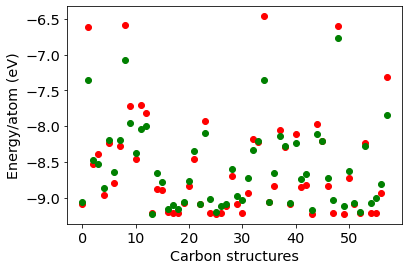

In [16]:
y_pred = rf.predict(x)
plt.plot(y, 'ro')
plt.plot(y_pred, 'go')
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred)
print('training RMSE = {:.3f} eV/atom'.format(np.sqrt(mse)))
plt.ylabel('Energy/atom (eV)')
plt.xlabel('Carbon structures')
plt.savefig('Energy_per_atom of carbon structures_Test', bbox_inches='tight')

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)